<h1 style="text-align: center;">Statistics</h1>

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")

## Linear Regression

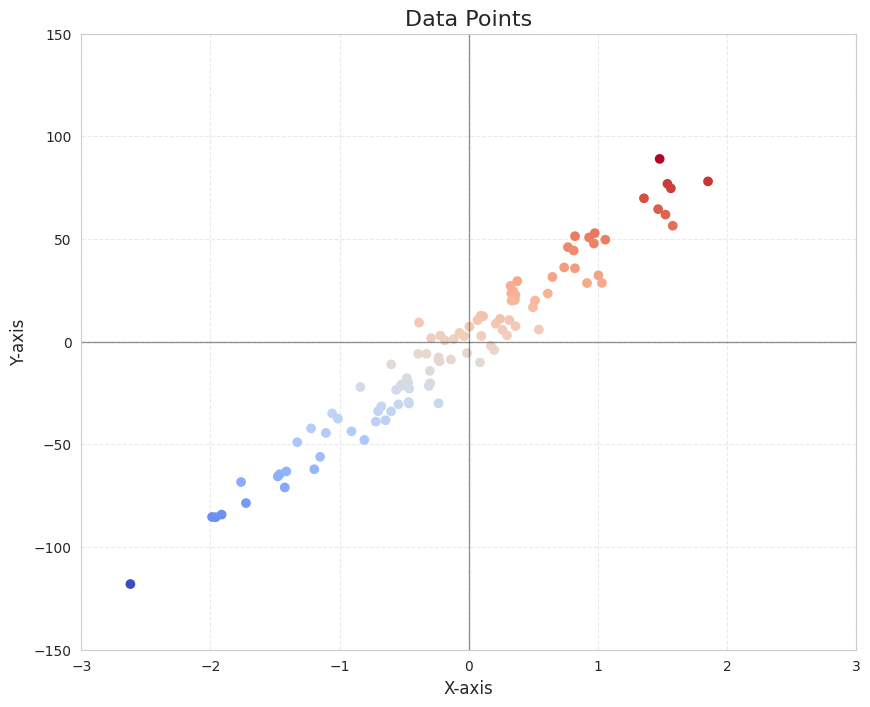

In [2]:
import sklearn
from sklearn.datasets import make_regression

data = make_regression(n_samples=100, noise=10, n_features=1, random_state=42)
x, y = data[0].squeeze(), data[1]
df = pd.DataFrame(np.stack((x, y), axis=-1), columns=["X", "Y"])
plt.figure(figsize=(10, 8))
plt.title("Data Points", fontsize=16)
plt.axhline(0, color='black', linewidth=1, alpha=0.4)  # X-axis
plt.axvline(0, color='black', linewidth=1, alpha=0.4)  # Y-axis
plt.scatter(x, y, c=y, cmap="coolwarm")
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-150, 150, 7))
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.grid(linestyle="--", alpha=0.4)
plt.show()

In [3]:
df["xy"] = [i * j for i, j in zip(df["X"], df["Y"])]
df["x2"] = [i**2 for i in df["X"]]
df["y2"] = [i**2 for i in df["Y"]]
n = df.X.shape[0]
display(df)

,X,Y,xy,x2,y2
0,0.931280,50.779929,47.290339,0.867283,2578.601233
1,0.087047,-10.065270,-0.876152,0.007577,101.309663
2,-1.057711,-34.918392,36.933565,1.118752,1219.294093
3,0.314247,10.526743,3.308001,0.098751,110.812318
4,-0.479174,-17.738377,8.499773,0.229608,314.650027
...,...,...,...,...,...
95,1.852278,78.085079,144.635288,3.430934,6097.279562
96,-1.424748,-70.968483,101.112217,2.029907,5036.525542
97,-0.719844,-38.902213,28.003533,0.518176,1513.382180
98,-0.072010,4.339229,-0.312468,0.005185,18.828908


- <h3> Using The Regression Formula</h3>

$$
b_{xy} = \frac{n \sum (XY) - \sum (X)\sum (Y)}{n\sum (X^2) - \sum(X)^2},     


b_{yx} = \frac{n \sum (XY) - \sum (X)\sum (Y)}{n\sum (Y^2) - \sum(Y)^2}
$$


In [4]:
b_xy = ((n * np.sum(df["xy"])) - (np.sum(df["X"]) * np.sum(df["Y"]))) / (n * np.sum(df["y2"]) - np.sum(df["Y"])**2)
b_yx = ((n * np.sum(df["xy"])) - (np.sum(df["X"]) * np.sum(df["Y"]))) / (n * np.sum(df["x2"]) - np.sum(df["X"])**2)
x_mean, y_mean = np.mean(df["X"]), np.mean(df["Y"])
b_xy, b_yx

(np.float64(0.021464581253257474), np.float64(44.43716999225497))

In [5]:
x_reg_line = np.linspace(-3, 3, 100)
y_reg_line = ((x_reg_line - np.mean(df["X"]))/b_xy) + np.mean(df["Y"])

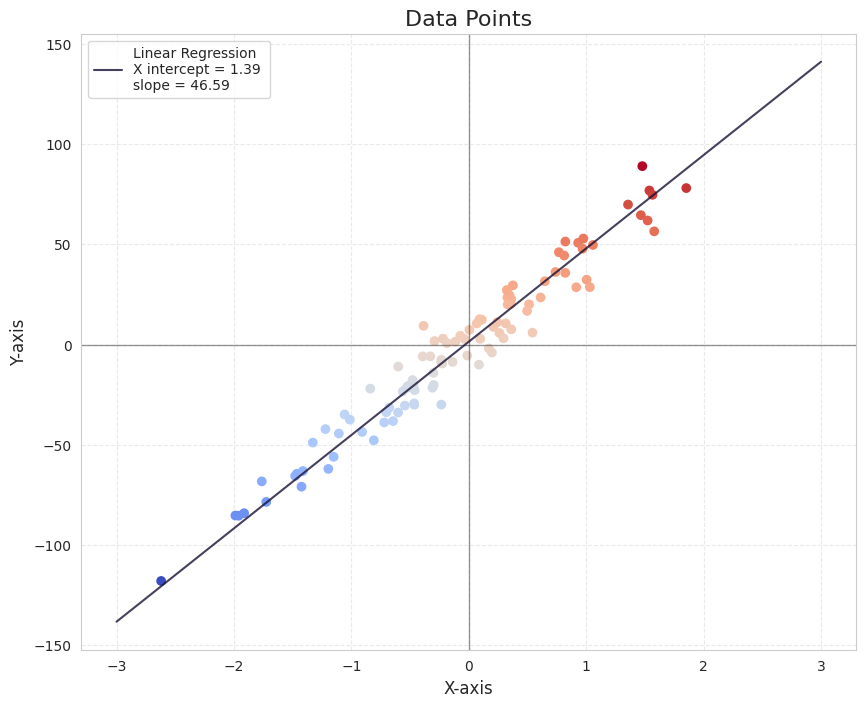

In [6]:
plt.figure(figsize=(10, 8))
plt.title("Data Points", fontsize=16)
plt.axhline(0, color='black', linewidth=1, alpha=0.4)
plt.axvline(0, color='black', linewidth=1, alpha=0.4)
plt.plot(x_reg_line, y_reg_line, c=(25/255, 16/255, 51/255), label=f"Linear Regression \nX intercept = {y_mean - (x_mean/b_xy):.2f} \nslope = {(1/b_xy):.2f}", alpha=0.8)
plt.scatter(x, y, c=y, cmap="coolwarm")
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

- <h3>Linear Regression Model (Sklearn Linear Model)</h3>
This model uses Gradient Descent to minimise its $R^2$ value

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

x_scaled = standardscaler.fit_transform(df["X"].to_numpy().reshape(-1, 1))

reg_model = LinearRegression()

reg_model.fit(x_scaled, np.array(df["Y"]))

y_pred = reg_model.coef_[0] * x_reg_line + reg_model.intercept_

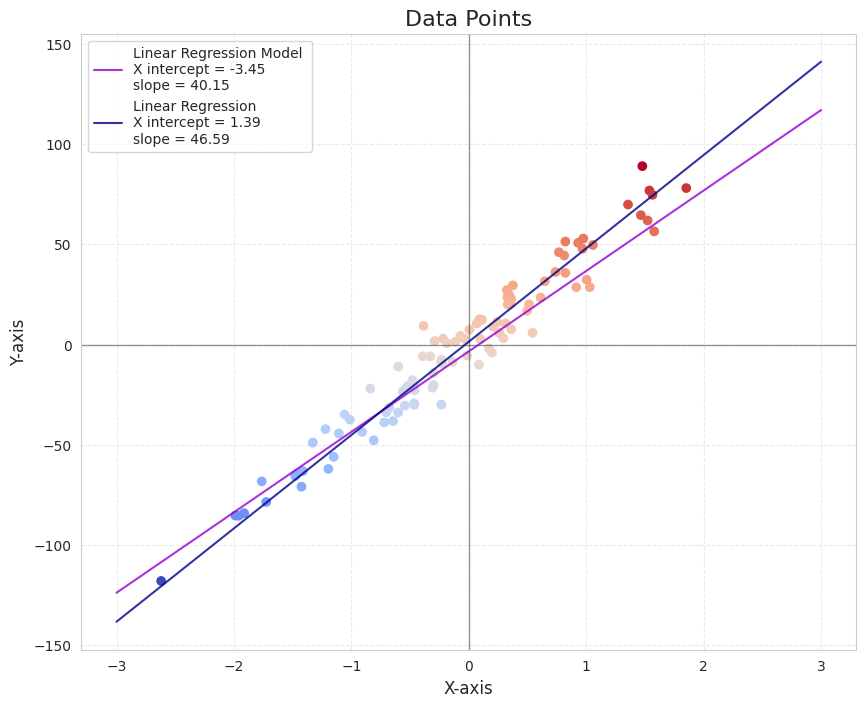

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Data Points", fontsize=16)
plt.axhline(0, color='black', linewidth=1, alpha=0.4)
plt.axvline(0, color='black', linewidth=1, alpha=0.4)
plt.plot(x_reg_line, y_pred.squeeze(), c="darkviolet", label=f"Linear Regression Model \nX intercept = {reg_model.intercept_:.2f} \nslope = {reg_model.coef_[0]:.2f}", alpha=0.8)
plt.plot(x_reg_line, y_reg_line, c="darkblue", label=f"Linear Regression \nX intercept = {y_mean - (x_mean/b_xy):.2f} \nslope = {(1/b_xy):.2f}", alpha=0.8)
plt.scatter(x, y, c=y, cmap="coolwarm")
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()